In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving alquiler.csv to alquiler.csv


In [3]:
df = pd.read_csv('/content/alquiler.csv',delimiter=';')
df

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
32956,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
32957,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0
32958,Departamento,Rímac,2,0,0,70,3000.0,760.0,NaN


Conocer el tipo de datos de cada columna, y demas informacion

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           32960 non-null  object 
 1   Distrito       32960 non-null  object 
 2   Cuartos        32960 non-null  int64  
 3   Vacantes       32960 non-null  int64  
 4   Suites         32960 non-null  int64  
 5   Area           32960 non-null  int64  
 6   Valor          32943 non-null  float64
 7   Mantenimiento  28867 non-null  float64
 8   Impuesto       22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


**Tratamiento de valores faltantes**

In [5]:
df[df.notnull().all(axis=1)]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0
...,...,...,...,...,...,...,...,...,...
32953,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
32955,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
32956,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
32957,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [6]:
df.isnull().sum()

Tipo                 0
Distrito             0
Cuartos              0
Vacantes             0
Suites               0
Area                 0
Valor               17
Mantenimiento     4093
Impuesto         10237
dtype: int64

In [7]:
nulos = df.isnull().sum().sum()
total = df.shape[0]
porcentaje = nulos/total*100

In [8]:
print(f'la cantidad total de valores de mi data es de: ',total)
print(f'la cantidad de valores nulos es de: ',nulos)
print(f'El porcentaje de valores nulos que hay en mi data es de: ',porcentaje,'%')

la cantidad total de valores de mi data es de:  32960
la cantidad de valores nulos es de:  14347
El porcentaje de valores nulos que hay en mi data es de:  43.52851941747573 %


In [9]:
#Conocer el promedio por cada columna
column_means = df[['Cuartos','Vacantes','Suites','Area','Valor','Mantenimiento','Impuesto']].mean()

print(column_means)


Cuartos              1.771390
Vacantes             1.749059
Suites               0.665777
Area               231.901547
Valor            12952.659715
Mantenimiento     2388.062424
Impuesto          2364.409585
dtype: float64


In [10]:
#Conocer la desviacion estandar de cada columna
column_desv = df[['Cuartos','Vacantes','Suites','Area','Valor','Mantenimiento','Impuesto']].std()

print(column_desv)

Cuartos               1.717869
Vacantes             20.380402
Suites                1.176525
Area               1135.254152
Valor            667521.969419
Mantenimiento     39184.959615
Impuesto         179564.062897
dtype: float64


**Valores atipicos de cada columna**

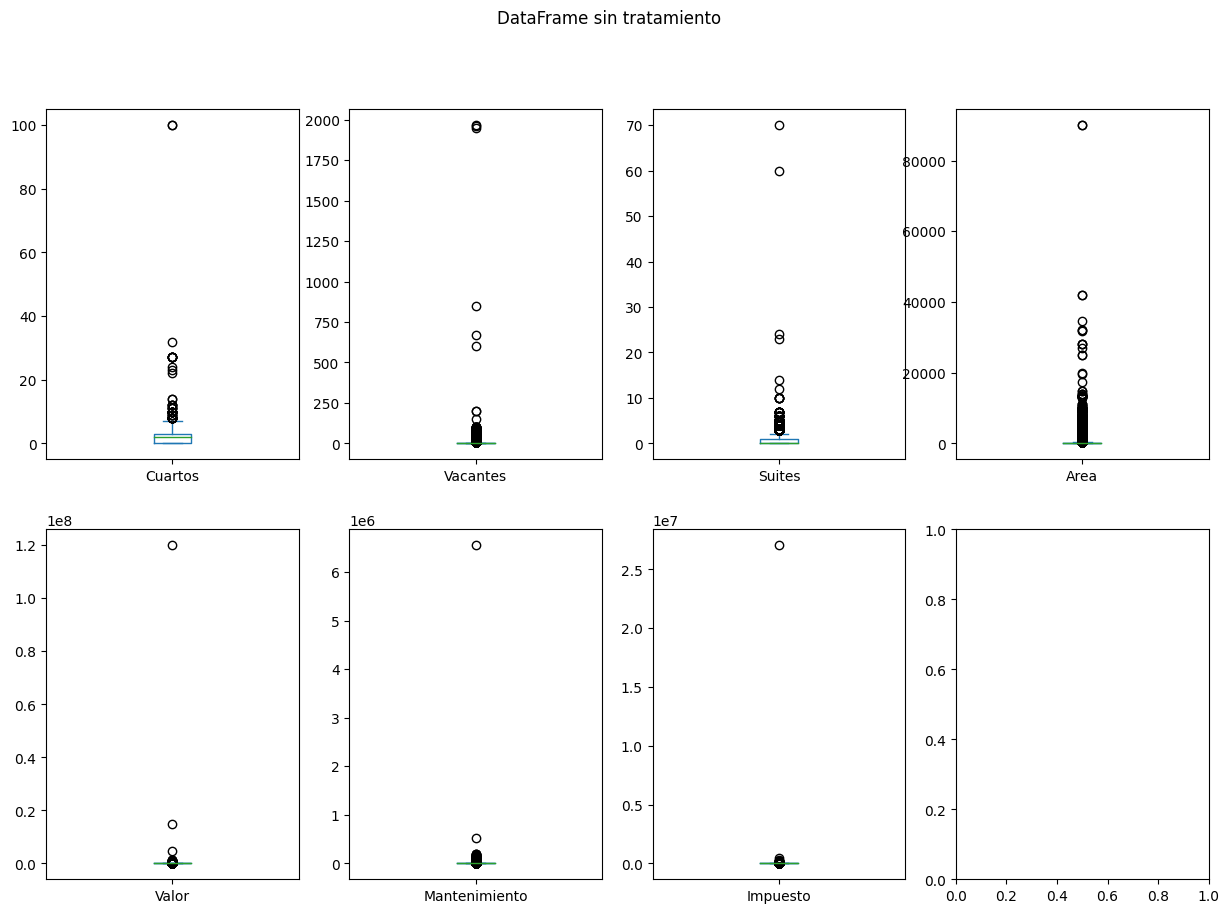

In [11]:
fig , ax = plt.subplots(2,4,figsize=(15,10))

df['Cuartos'].plot(kind='box', ax=ax[0, 0])
df['Vacantes'].plot(kind='box', ax=ax[0, 1])
df['Suites'].plot(kind='box', ax=ax[0, 2])
df['Area'].plot(kind='box', ax=ax[0, 3])
df['Valor'].plot(kind='box', ax=ax[1, 0])
df['Mantenimiento'].plot(kind='box', ax=ax[1, 1])
df['Impuesto'].plot(kind='box', ax=ax[1, 2])

plt.suptitle('DataFrame sin tratamiento')

plt.show()

In [12]:
filter = df.iloc[:,[2,3,4,5,6,7,8]]
filter

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,1,0,0,40,1700.0,500.0,60.0
1,2,0,1,100,7000.0,NaN,NaN
2,0,4,0,150,5200.0,4020.0,1111.0
3,1,0,0,15,800.0,390.0,20.0
4,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...
32955,0,0,0,27,800.0,350.0,25.0
32956,3,1,2,78,1800.0,800.0,40.0
32957,2,1,0,48,1400.0,509.0,37.0
32958,2,0,0,70,3000.0,760.0,NaN


In [13]:
for columna in filter.columns:
  q1 = filter[columna].quantile(0.25)
  q3 = filter[columna].quantile(0.75)
  iiq = q3-q1
  lim_s = q3 + 1.5 * iiq
  lim_i = q1 - 1.5 * iiq
  df[columna] = filter[(filter[columna] >= lim_i) & (filter[columna] <= lim_s)][columna]

In [14]:
df

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1.0,0.0,0.0,40.0,1700.0,500.0,60.0
1,Casa,Lurigancho,2.0,0.0,1.0,100.0,7000.0,NaN,NaN
2,Local comercial,Ate,0.0,4.0,0.0,150.0,5200.0,NaN,1111.0
3,Departamento,Pachacámac,1.0,0.0,0.0,15.0,800.0,390.0,20.0
4,Departamento,Ate,1.0,0.0,0.0,48.0,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Habitación,Pachacámac,0.0,0.0,0.0,27.0,800.0,350.0,25.0
32956,Departamento,Lince,3.0,1.0,2.0,78.0,1800.0,800.0,40.0
32957,Departamento,Rímac,2.0,1.0,0.0,48.0,1400.0,509.0,37.0
32958,Departamento,Rímac,2.0,0.0,0.0,70.0,3000.0,760.0,NaN


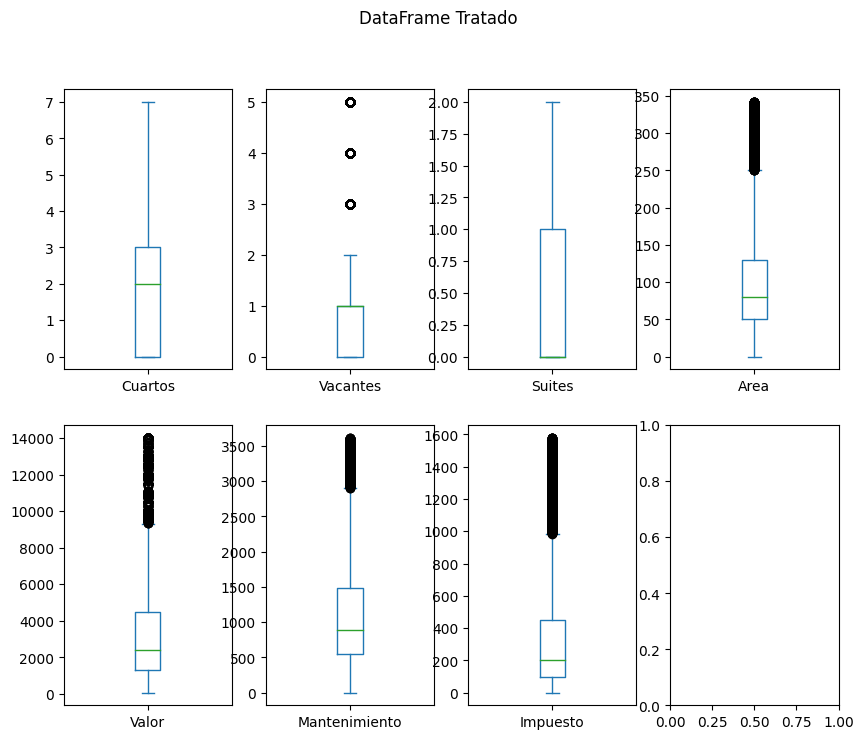

In [15]:
fig, ax = plt.subplots(2,4,figsize=(10,8))

df['Cuartos'].plot(kind='box',ax=ax[0,0])
df['Vacantes'].plot(kind='box',ax=ax[0,1])
df['Suites'].plot(kind='box',ax=ax[0,2])
df['Area'].plot(kind='box',ax=ax[0,3])
df['Valor'].plot(kind='box',ax=ax[1,0])
df['Mantenimiento'].plot(kind='box',ax=ax[1,1])
df['Impuesto'].plot(kind='box',ax=ax[1,2])

fig.suptitle('DataFrame Tratado')

plt.show()

Una vez los valores atipicos han sido tratados, se procede a tratar estos valores faltantes

<ipython-input-16-234d428d03fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cuartos'], kde=True, color='red', ax=ax[0, 0])
<ipython-input-16-234d428d03fb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vacantes'],kde=True,color='red', ax=ax[0,1])
<ipython-input-16-234d428d03fb>:5:

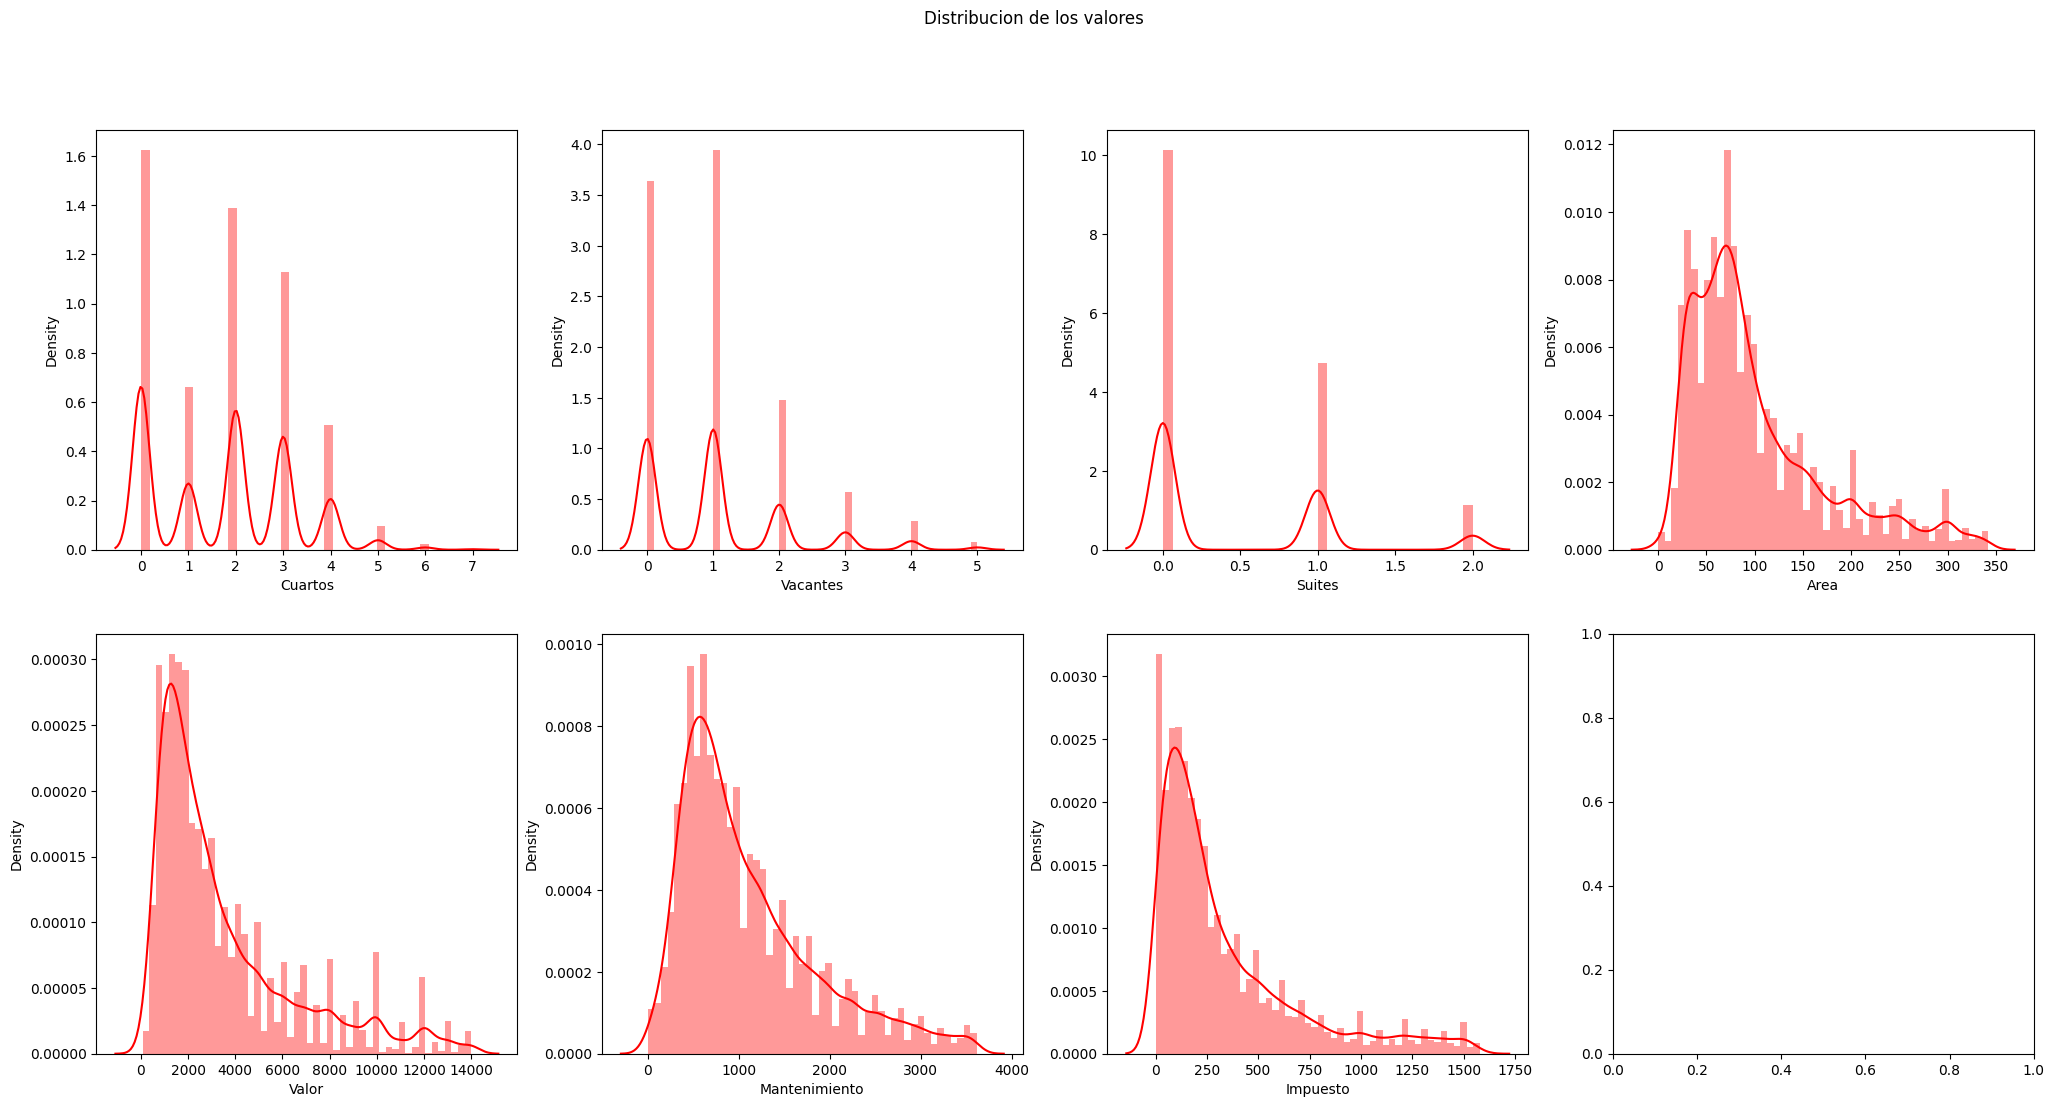

In [16]:

fig, ax = plt.subplots(2,4,figsize=(25,12))

sns.distplot(df['Cuartos'], kde=True, color='red', ax=ax[0, 0])
sns.distplot(df['Vacantes'],kde=True,color='red', ax=ax[0,1])
sns.distplot(df['Suites'],kde=True,color='red', ax=ax[0,2])
sns.distplot(df['Area'], kde=True, color='red', ax=ax[0, 3])
sns.distplot(df['Valor'],kde=True,color='red', ax=ax[1,0])
sns.distplot(df['Mantenimiento'],kde=True,color='red', ax=ax[1,1])
sns.distplot(df['Impuesto'],kde=True,color='red',ax=ax[1,2])

plt.suptitle('Distribucion de los valores')

plt.show()

Intervalos de confianza

In [17]:
df

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1.0,0.0,0.0,40.0,1700.0,500.0,60.0
1,Casa,Lurigancho,2.0,0.0,1.0,100.0,7000.0,NaN,NaN
2,Local comercial,Ate,0.0,4.0,0.0,150.0,5200.0,NaN,1111.0
3,Departamento,Pachacámac,1.0,0.0,0.0,15.0,800.0,390.0,20.0
4,Departamento,Ate,1.0,0.0,0.0,48.0,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Habitación,Pachacámac,0.0,0.0,0.0,27.0,800.0,350.0,25.0
32956,Departamento,Lince,3.0,1.0,2.0,78.0,1800.0,800.0,40.0
32957,Departamento,Rímac,2.0,1.0,0.0,48.0,1400.0,509.0,37.0
32958,Departamento,Rímac,2.0,0.0,0.0,70.0,3000.0,760.0,NaN


In [18]:
from scipy.stats import norm

for columna in filter.columns:
    mean = df[columna].mean()
    std_dev = df[columna].std()
    confidence_interval = norm.interval(confidence = 0.95, loc=mean, scale=std_dev / df.shape[0])
    # redondear valores
    confidence_interval = tuple(round(val, 2) for val in confidence_interval)
    print(f"95% de confianza para la columna {columna}:", confidence_interval)

95% de confianza para la columna Cuartos: (1.75, 1.75)
95% de confianza para la columna Vacantes: (1.01, 1.01)
95% de confianza para la columna Suites: (0.44, 0.44)
95% de confianza para la columna Area: (100.49, 100.5)
95% de confianza para la columna Valor: (3490.55, 3490.91)
95% de confianza para la columna Mantenimiento: (1105.58, 1105.67)
95% de confianza para la columna Impuesto: (335.56, 335.6)


Imputacion de valores por el metodo de Kvecino mas cercanos

In [19]:
faltantes = df.iloc[:,[2,3,4,5,6,7,8]]#columnas a imptuar
faltantes

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,1.0,0.0,0.0,40.0,1700.0,500.0,60.0
1,2.0,0.0,1.0,100.0,7000.0,NaN,NaN
2,0.0,4.0,0.0,150.0,5200.0,NaN,1111.0
3,1.0,0.0,0.0,15.0,800.0,390.0,20.0
4,1.0,0.0,0.0,48.0,800.0,230.0,NaN
...,...,...,...,...,...,...,...
32955,0.0,0.0,0.0,27.0,800.0,350.0,25.0
32956,3.0,1.0,2.0,78.0,1800.0,800.0,40.0
32957,2.0,1.0,0.0,48.0,1400.0,509.0,37.0
32958,2.0,0.0,0.0,70.0,3000.0,760.0,NaN


In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5,weights='uniform')#el peso de los vecino sera uniforme
imputer_uni = imputer.fit_transform(faltantes)

imputer = KNNImputer(n_neighbors=5,weights='distance')#el peso de los vecinos sera daterminado por la distancia
imputer_dis = imputer.fit_transform(faltantes)

In [21]:
#se crea un data frame para imputer_uni cuyo peso fue uniforme
df_uni = pd.DataFrame(imputer_uni)
df_uni

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,40.0,1700.0,500.0,60.0
1,2.0,0.0,1.0,100.0,7000.0,1100.0,745.6
2,0.0,4.0,0.0,150.0,5200.0,728.2,1111.0
3,1.0,0.0,0.0,15.0,800.0,390.0,20.0
4,1.0,0.0,0.0,48.0,800.0,230.0,935.0
...,...,...,...,...,...,...,...
32955,0.0,0.0,0.0,27.0,800.0,350.0,25.0
32956,3.0,1.0,2.0,78.0,1800.0,800.0,40.0
32957,2.0,1.0,0.0,48.0,1400.0,509.0,37.0
32958,2.0,0.0,0.0,70.0,3000.0,760.0,720.6


In [22]:
#se crea un data frame para imputer_uni cuyo peso fue determinado por la distancia
df_sep = pd.DataFrame(imputer_dis)
df_sep

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,40.0,1700.0,500.0,60.000000
1,2.0,0.0,1.0,100.0,7000.0,650.0,646.666667
2,0.0,4.0,0.0,150.0,5200.0,728.2,1111.000000
3,1.0,0.0,0.0,15.0,800.0,390.0,20.000000
4,1.0,0.0,0.0,48.0,800.0,230.0,935.000000
...,...,...,...,...,...,...,...
32955,0.0,0.0,0.0,27.0,800.0,350.0,25.000000
32956,3.0,1.0,2.0,78.0,1800.0,800.0,40.000000
32957,2.0,1.0,0.0,48.0,1400.0,509.0,37.000000
32958,2.0,0.0,0.0,70.0,3000.0,760.0,863.250000


In [23]:
#se guarda las primeras 2 columnas del data frame original df
col_der = df.iloc[:,[0,1]]

In [24]:
df_n = pd.concat([col_der,df_uni],axis=1)
df_n

,Tipo,Distrito,0,1,2,3,4,5,6
0,Habitación,San Borja,1.0,0.0,0.0,40.0,1700.0,500.0,60.0
1,Casa,Lurigancho,2.0,0.0,1.0,100.0,7000.0,1100.0,745.6
2,Local comercial,Ate,0.0,4.0,0.0,150.0,5200.0,728.2,1111.0
3,Departamento,Pachacámac,1.0,0.0,0.0,15.0,800.0,390.0,20.0
4,Departamento,Ate,1.0,0.0,0.0,48.0,800.0,230.0,935.0
...,...,...,...,...,...,...,...,...,...
32955,Habitación,Pachacámac,0.0,0.0,0.0,27.0,800.0,350.0,25.0
32956,Departamento,Lince,3.0,1.0,2.0,78.0,1800.0,800.0,40.0
32957,Departamento,Rímac,2.0,1.0,0.0,48.0,1400.0,509.0,37.0
32958,Departamento,Rímac,2.0,0.0,0.0,70.0,3000.0,760.0,720.6


In [25]:
df.columns

Index(['Tipo', 'Distrito', 'Cuartos', 'Vacantes', 'Suites', 'Area', 'Valor',
       'Mantenimiento', 'Impuesto'],
      dtype='object')

In [26]:
#se da nombre a las columnas a traves de un diccionario
col = {0:'Cuartos',1:'Vacantes',2:'Suites',3:'Area',4:'Valor',5:'Mantenimiento',6:'Impuesto'}
df_n = df_n.rename(columns=col)
df_n.sample(6)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
26623,Casa en condominio,La Perla,6.0,3.0,0.4,274.8,7400.0,2000.0,751.2
27593,Departamento,San Borja,4.0,1.0,1.0,180.0,6000.0,2300.0,211.0
17963,Departamento,San Borja,2.0,2.0,1.0,110.0,5000.0,950.0,150.0
6101,Departamento,San Borja,3.0,0.0,1.0,116.0,3500.0,850.0,150.0
31330,Departamento,Jesús María,2.0,1.0,1.0,65.0,1600.0,600.0,120.0
20809,Tienda/Salón,Chaclacayo,0.0,0.0,0.0,27.0,3000.0,1014.4,98.0


In [27]:
#calcular el promedio de los datos sin imputacion y con imputacion
print(df.mean())
print('---------'*30)
print(df_n.mean())

<ipython-input-27-f27b1dbba879>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


Cuartos             1.746862
Vacantes            1.012651
Suites              0.436839
Area              100.493700
Valor            3490.729816
Mantenimiento    1105.629229
Impuesto          335.582975
dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cuartos             1.746321
Vacantes            1.032385
Suites              0.490881
Area              111.698492
Valor            3799.551794
Mantenimiento    1152.392015
Impuesto          534.136207
dtype: float64


<ipython-input-27-f27b1dbba879>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_n.mean())


In [28]:
#calcular la desviacion estandar de los datos sin imputacion y con imputacion
print(df.std())
print('---------'*30)
print(df_n.std())

Cuartos             1.442626
Vacantes            1.056078
Suites              0.621747
Area               70.891995
Valor            3000.586972
Mantenimiento     752.877980
Impuesto          346.382911
dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cuartos             1.442725
Vacantes            1.055829
Suites              0.642290
Area               77.151066
Valor            3177.234953
Mantenimiento     743.337737
Impuesto          395.404949
dtype: float64


<ipython-input-28-93c6674e4f17>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())
<ipython-input-28-93c6674e4f17>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_n.std())


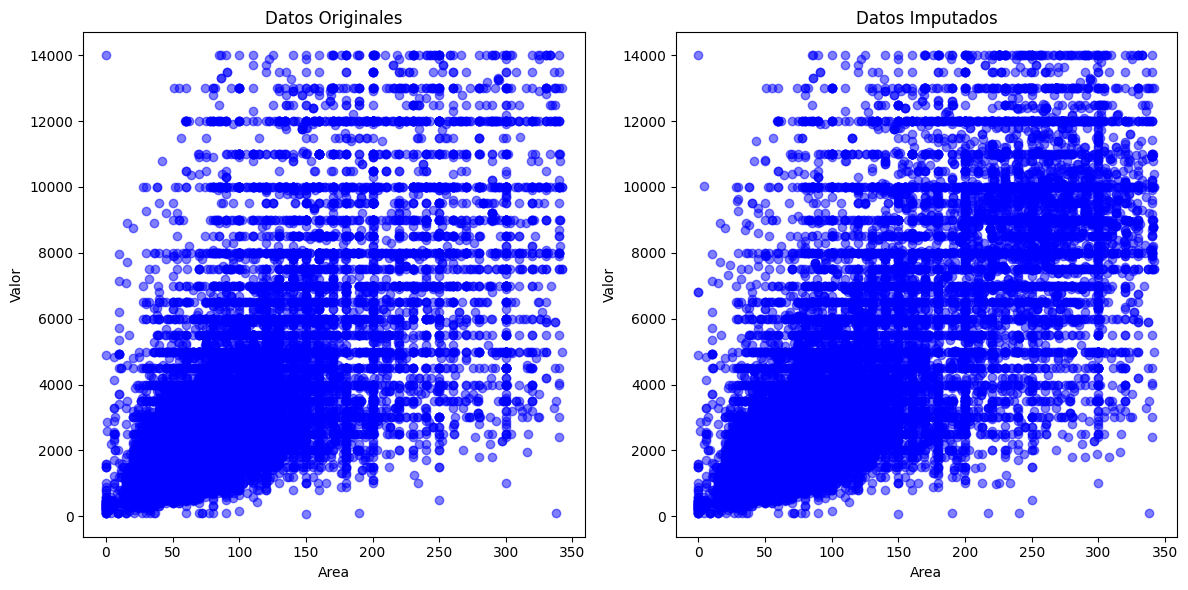

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión para los datos originales
ax[0].scatter(df['Area'], df['Valor'], color='blue', alpha=0.5)
ax[0].set_title('Datos Originales')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Valor')

# Gráfico de dispersión para los datos imputados
ax[1].scatter(df_n['Area'], df_n['Valor'], color='blue', alpha=0.5)
ax[1].set_title('Datos Imputados')
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Valor')

# Mostrar los subplots
plt.tight_layout()
plt.show()


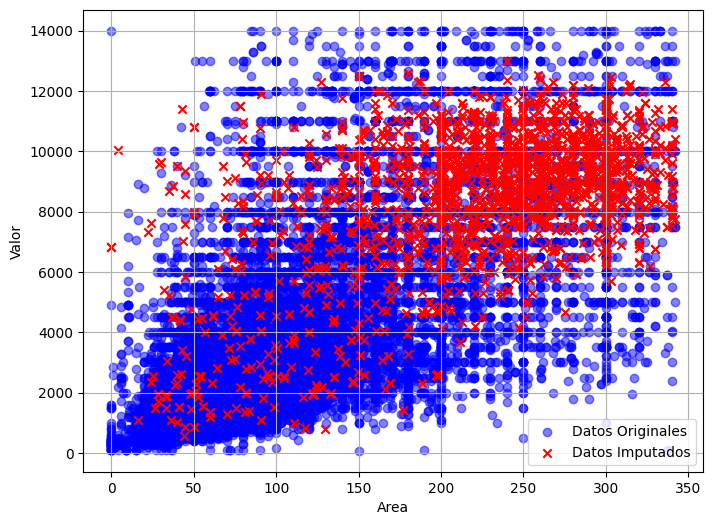

In [30]:
plt.figure(figsize=(8, 6))

# Gráfico de dispersión para todos los datos de df
plt.scatter(df['Area'], df['Valor'], color='blue', alpha=0.5, label='Datos Originales')

# Crear una máscara booleana para los valores imputados
mask_imputed = df['Valor'].isnull() & df_n['Valor'].notnull()

# Gráfico de dispersión para los datos imputados
plt.scatter(df_n.loc[mask_imputed, 'Area'], df_n.loc[mask_imputed, 'Valor'], color='red', marker='x', label='Datos Imputados')

# Etiquetas de ejes y leyenda
plt.xlabel('Area')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.show()
